In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, t = datasets.make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)
X_bias = np.insert(X,1,1,axis=1)
train_x = X_bias[:80]
test_x = X_bias[80:]

train_t = t[:80]
test_t = t[80:]

print(train_x.shape)
print(test_x.shape)
print(train_t.shape)
print(test_t.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [3]:
class Model() :
    def __init__(self) :
        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(units=1, activation='linear'))
        self.learning_rate = float(input('learning_rate : '))
        self.batch_size = int(input('batch_size : '))
        self.epochs = int(input('epochs : '))
        self.x = []
        self.y = []
    
    def train(self, train_x, train_t) :
        optimizer = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
        self.model.compile(loss='mean_squared_error', optimizer=optimizer)
        result = self.model.fit(
            train_x, train_t, batch_size=self.batch_size, epochs=self.epochs, shuffle=True
            )
        self.x = list(range(len(result.history['loss'])))
        self.y = result.history['loss']
        
        return result.history['loss']
    
    def test(self, target_x) :
        pre = self.model.predict(target_x)
        return pre
    
    def pred(self, test_x, test_t) :
        eva = self.model.evaluate(test_x, test_t)
        return eva

    def loss_visualization(self) :
        plt.plot(self.x, self.y)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

In [4]:
model = Model()

Epoch 1/90
2/2 [==============================] - 0s 2ms/step - loss: 4000.8620
Epoch 2/90
2/2 [==============================] - 0s 2ms/step - loss: 3810.6568
Epoch 3/90
2/2 [==============================] - 0s 2ms/step - loss: 3460.6533
Epoch 4/90
2/2 [==============================] - 0s 2ms/step - loss: 3626.8639
Epoch 5/90
2/2 [==============================] - 0s 3ms/step - loss: 4017.0485
Epoch 6/90
2/2 [==============================] - 0s 2ms/step - loss: 3768.0396
Epoch 7/90
2/2 [==============================] - 0s 2ms/step - loss: 3342.9282
Epoch 8/90
2/2 [==============================] - 0s 2ms/step - loss: 3842.9668
Epoch 9/90
2/2 [==============================] - 0s 3ms/step - loss: 3707.9826
Epoch 10/90
2/2 [==============================] - 0s 2ms/step - loss: 3559.0170
Epoch 11/90
2/2 [==============================] - 0s 2ms/step - loss: 3357.0885
Epoch 12/90
2/2 [==============================] - 0s 3ms/step - loss: 3571.5541
Epoch 13/90
2/2 [====================

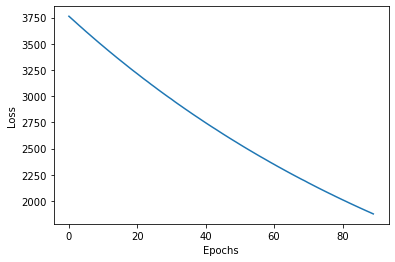

In [5]:
model.train(train_x, train_t)
model.loss_visualization()